In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline

8


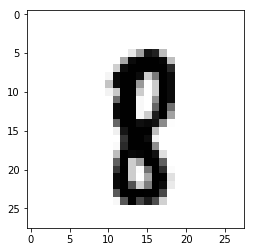

(60000, 28, 28)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(y_train[4598])
plt.imshow(x_train[4598], cmap='Greys')
plt.show()
x_train.shape


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

Epoch 1/2
10000/10000 [==============================] - 10s 974us/sample - loss: 0.0132 - acc: 0.9966TA: 1s - l
Epoch 2/2
10000/10000 [==============================] - 9s 944us/sample - loss: 0.0142 - acc: 0.9955


In [39]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 3s 285us/sample - loss: 0.0083 - acc: 0.9984


[0.008310908635132364, 0.9984]

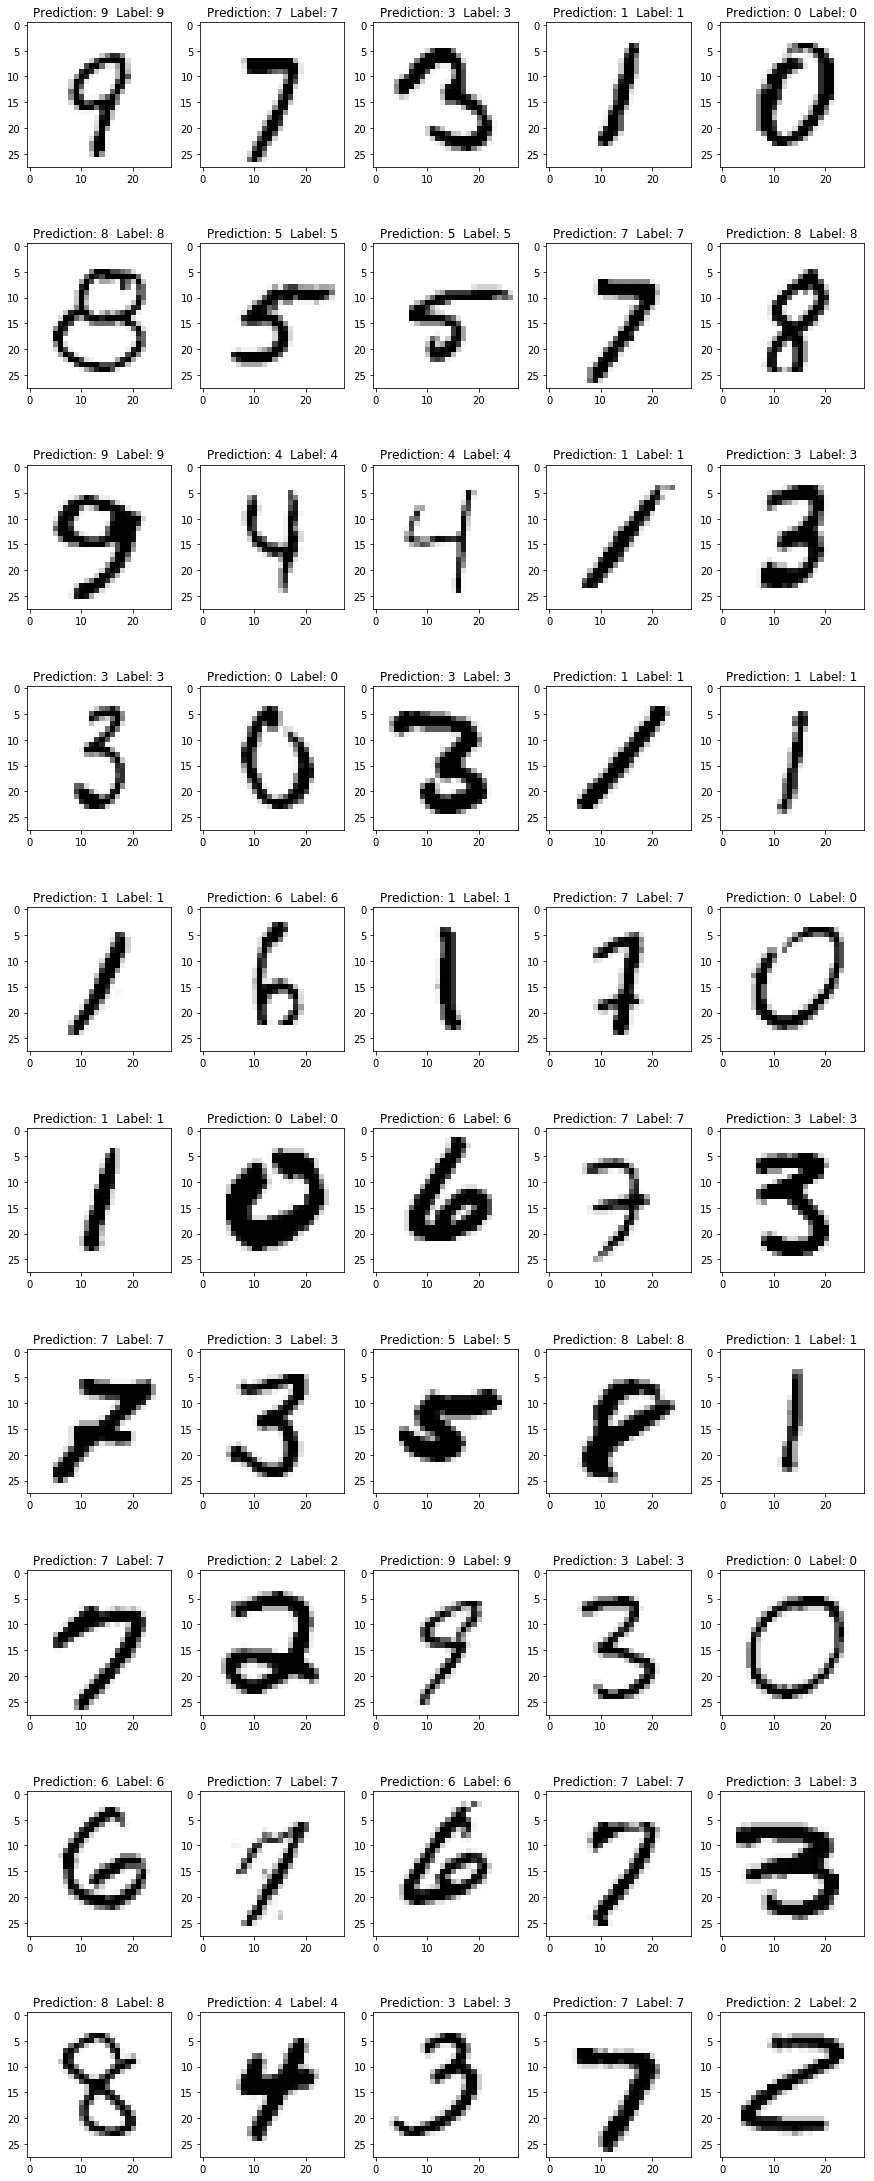

In [51]:
import random

fig = plt.figure(figsize = (15.0, 40.0))
for i in range(50):
    image_index = random.randint(0,9999)
    ax = fig.add_subplot(10,5,i+1)
    ax.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    plt.title("Prediction: " + str(pred.argmax()) + "  Label: " + str(y_test[image_index]))
plt.show()